In [1]:
from __future__ import division
from __future__ import print_function

import time
import numpy as np

import torch
import torch.nn.functional as F
import torch.optim as optim

from utils import load_data, test, run_experiment
from models import GCN_2, GCN_3, ite_GCN

In [2]:
adj, features, labels, idx_train, idx_val, idx_test = load_data(path="../data/cora/", dataset="cora")

Loading cora dataset...


In [3]:
hidden = 16
dropout = 0.5
lr = 0.01
weight_decay = 5e-4
num_epochs = 200
smooth_fac = 0.2

In [4]:
model0 = GCN_2(nfeat=features.shape[1],
            nhid=hidden,
            nclass=labels.max().item() + 1,
            dropout=dropout
)
run_experiment(num_epochs=num_epochs, model=model0, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)


Intialize a 2-layer GCN
runrunrun!
Epoch: 0001 loss_train: 1.9515 acc_train: 0.1571 loss_val: 1.9670 acc_val: 0.1567 time: 0.0332s
Epoch: 0002 loss_train: 1.9380 acc_train: 0.2214 loss_val: 1.9534 acc_val: 0.1567 time: 0.0086s
Epoch: 0003 loss_train: 1.9241 acc_train: 0.2071 loss_val: 1.9401 acc_val: 0.1567 time: 0.0077s
Epoch: 0004 loss_train: 1.9174 acc_train: 0.1929 loss_val: 1.9272 acc_val: 0.1567 time: 0.0081s
Epoch: 0005 loss_train: 1.9047 acc_train: 0.2000 loss_val: 1.9148 acc_val: 0.1567 time: 0.0084s
Epoch: 0006 loss_train: 1.8846 acc_train: 0.2000 loss_val: 1.9026 acc_val: 0.1567 time: 0.0096s
Epoch: 0007 loss_train: 1.8694 acc_train: 0.2000 loss_val: 1.8904 acc_val: 0.1567 time: 0.0086s
Epoch: 0008 loss_train: 1.8666 acc_train: 0.1929 loss_val: 1.8783 acc_val: 0.1567 time: 0.0091s
Epoch: 0009 loss_train: 1.8542 acc_train: 0.2071 loss_val: 1.8662 acc_val: 0.1567 time: 0.0072s
Epoch: 0010 loss_train: 1.8455 acc_train: 0.2000 loss_val: 1.8539 acc_val: 0.1567 time: 0.0073s
Epoch

In [5]:
model1 = GCN_3(nfeat=features.shape[1],
            nhid=hidden,
            nclass=labels.max().item() + 1,
            dropout=dropout)
run_experiment(num_epochs=num_epochs, model=model1, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)


Intialize a 3-layer GCN
runrunrun!
Epoch: 0001 loss_train: 1.9731 acc_train: 0.1500 loss_val: 1.9568 acc_val: 0.1133 time: 0.0145s
Epoch: 0002 loss_train: 1.9454 acc_train: 0.1214 loss_val: 1.9333 acc_val: 0.1567 time: 0.0108s
Epoch: 0003 loss_train: 1.9221 acc_train: 0.2357 loss_val: 1.9110 acc_val: 0.1567 time: 0.0104s
Epoch: 0004 loss_train: 1.8941 acc_train: 0.2429 loss_val: 1.8898 acc_val: 0.1567 time: 0.0103s
Epoch: 0005 loss_train: 1.8871 acc_train: 0.3143 loss_val: 1.8700 acc_val: 0.3800 time: 0.0109s
Epoch: 0006 loss_train: 1.8674 acc_train: 0.2357 loss_val: 1.8514 acc_val: 0.3500 time: 0.0099s
Epoch: 0007 loss_train: 1.8583 acc_train: 0.2786 loss_val: 1.8342 acc_val: 0.3500 time: 0.0099s
Epoch: 0008 loss_train: 1.8371 acc_train: 0.2929 loss_val: 1.8188 acc_val: 0.3500 time: 0.0098s
Epoch: 0009 loss_train: 1.8407 acc_train: 0.2786 loss_val: 1.8057 acc_val: 0.3500 time: 0.0089s
Epoch: 0010 loss_train: 1.8026 acc_train: 0.3000 loss_val: 1.7947 acc_val: 0.3500 time: 0.0100s
Epoch

In [6]:
model2 = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=0,
            train_nite= 2,
            eval_nite= 0,
            allow_grad=True,
            smooth_fac=smooth_fac)
run_experiment(num_epochs=num_epochs, model=model2, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)

Unspecified or invalid number of iterations for inference. Treat as the same as training iterations.
Initialize a 1-layer GCN with  2 training iterations and  2  inference iterations.
Gradient flows to all iterations:  True
runrunrun!
Epoch: 0001 loss_train: 1.9456 acc_train: 0.1286 loss_val: 1.8231 acc_val: 0.3500 time: 0.3840s
Epoch: 0002 loss_train: 1.8283 acc_train: 0.2929 loss_val: 2.0285 acc_val: 0.3500 time: 0.3720s
Epoch: 0003 loss_train: 2.0665 acc_train: 0.2929 loss_val: 1.7869 acc_val: 0.3500 time: 0.3877s
Epoch: 0004 loss_train: 1.7866 acc_train: 0.2929 loss_val: 1.8439 acc_val: 0.3500 time: 0.3730s
Epoch: 0005 loss_train: 1.8293 acc_train: 0.2929 loss_val: 1.8350 acc_val: 0.1567 time: 0.3805s
Epoch: 0006 loss_train: 1.8104 acc_train: 0.2000 loss_val: 1.7886 acc_val: 0.1567 time: 0.3750s
Epoch: 0007 loss_train: 1.7455 acc_train: 0.2000 loss_val: 1.7283 acc_val: 0.1567 time: 0.3789s
Epoch: 0008 loss_train: 1.6626 acc_train: 0.2000 loss_val: 1.5909 acc_val: 0.4200 time: 0.380

In [7]:
model3 = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=0,
            train_nite= 3,
            eval_nite= 0,
            allow_grad=True,
            smooth_fac=smooth_fac)
run_experiment(num_epochs=num_epochs, model=model3, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)

Unspecified or invalid number of iterations for inference. Treat as the same as training iterations.
Initialize a 1-layer GCN with  3 training iterations and  3  inference iterations.
Gradient flows to all iterations:  True
runrunrun!
Epoch: 0001 loss_train: 1.9457 acc_train: 0.1500 loss_val: 2.0419 acc_val: 0.3500 time: 0.7373s
Epoch: 0002 loss_train: 2.0536 acc_train: 0.2929 loss_val: 1.9556 acc_val: 0.1033 time: 0.6928s
Epoch: 0003 loss_train: 1.9567 acc_train: 0.1000 loss_val: 1.9385 acc_val: 0.3500 time: 0.6861s
Epoch: 0004 loss_train: 1.9392 acc_train: 0.2929 loss_val: 1.9309 acc_val: 0.3500 time: 0.7241s
Epoch: 0005 loss_train: 1.9316 acc_train: 0.2929 loss_val: 1.8986 acc_val: 0.3500 time: 0.6768s
Epoch: 0006 loss_train: 1.8977 acc_train: 0.2929 loss_val: 1.8277 acc_val: 0.3500 time: 0.6829s
Epoch: 0007 loss_train: 1.8240 acc_train: 0.2929 loss_val: 1.8847 acc_val: 0.3500 time: 0.7931s
Epoch: 0008 loss_train: 1.8866 acc_train: 0.2929 loss_val: 1.7606 acc_val: 0.3500 time: 0.718

In [8]:
test_losses = []
test_accuracies = []

for i in range(1, 30):
    model = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=0,
            train_nite= 2,
            eval_nite= i,
            allow_grad=True,
            smooth_fac=smooth_fac)
    model.load_state_dict(model2.state_dict().copy())
    loss_test, acc_test = test(model, features, adj, idx_test, labels)
    test_losses.append(loss_test.item())
    test_accuracies.append(acc_test.item())


Initialize a 1-layer GCN with  2 training iterations and  1  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.7776 accuracy= 0.1480
inference time:  0.07413291931152344
Initialize a 1-layer GCN with  2 training iterations and  2  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 0.7452 accuracy= 0.7750
inference time:  0.11711907386779785
Initialize a 1-layer GCN with  2 training iterations and  3  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 9.8666 accuracy= 0.3620
inference time:  0.18607687950134277
Initialize a 1-layer GCN with  2 training iterations and  4  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 51.8570 accuracy= 0.3160
inference time:  0.22497105598449707
Initialize a 1-layer GCN with  2 training iterations and  5  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 346.4895 accuracy= 0

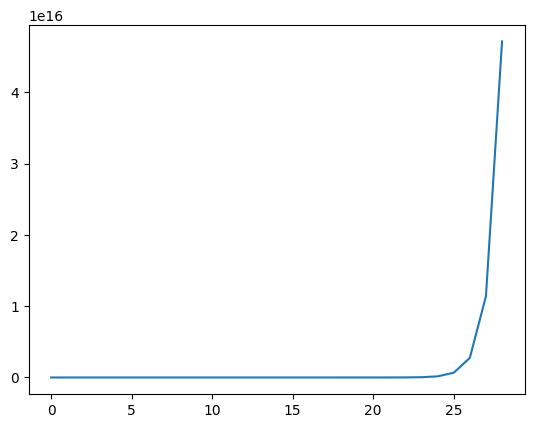

In [9]:
import matplotlib.pyplot as plt
plt.plot(test_losses)

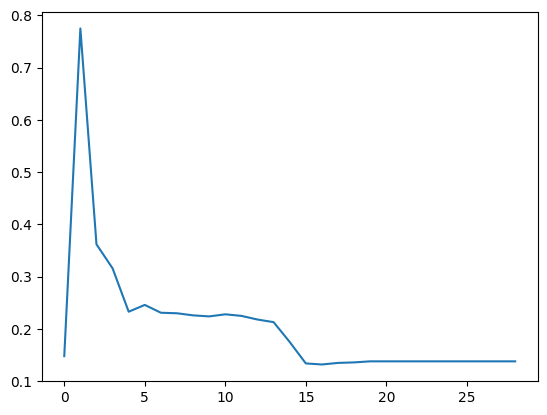

In [10]:
plt.plot(test_accuracies)

In [11]:
test_losses = []
test_accuracies = []

for i in range(1, 30):
    model = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=0,
            train_nite= 3,
            eval_nite= i,
            allow_grad=True,
            smooth_fac=smooth_fac)
    model.load_state_dict(model3.state_dict().copy())
    loss_test, acc_test = test(model, features, adj, idx_test, labels)
    test_losses.append(loss_test.item())
    test_accuracies.append(acc_test.item())


Initialize a 1-layer GCN with  3 training iterations and  1  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.8486 accuracy= 0.2880
inference time:  0.0750892162322998
Initialize a 1-layer GCN with  3 training iterations and  2  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 2.5593 accuracy= 0.2250
inference time:  0.1179361343383789
Initialize a 1-layer GCN with  3 training iterations and  3  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.3012 accuracy= 0.7440
inference time:  0.17525386810302734
Initialize a 1-layer GCN with  3 training iterations and  4  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 75.4059 accuracy= 0.3450
inference time:  0.2232980728149414
Initialize a 1-layer GCN with  3 training iterations and  5  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 54.7358 accuracy= 0.607

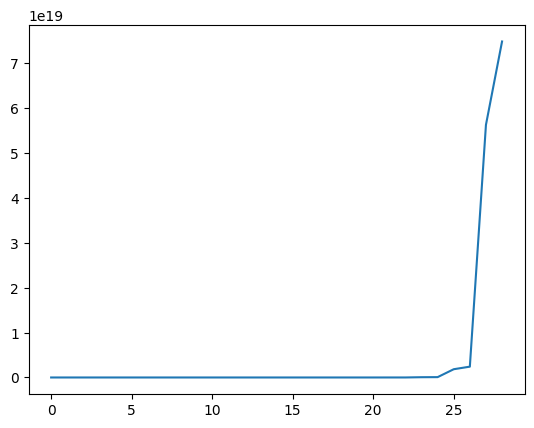

In [12]:
plt.plot(test_losses)

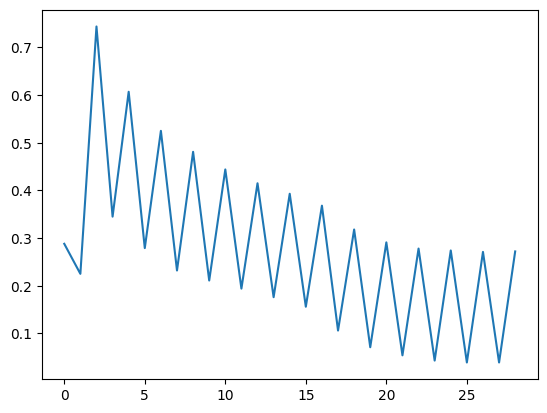

In [13]:
plt.plot(test_accuracies)